K-means Clustering

At the beginning we'll talk about clustering method. Clustering (sementation) is one of the tasks of data mining, it's an automatic identification of natural goupings of things, it employes unsupervised learning. clusterimg uses many algorithms and one of them is known as k-means, k-means algorithm composed of 4 steps: 1- determine value of k (number of clusters) 2- generate k points as initial cluster centers 3- assign every point to the nearest cluster centre 4- repeat the steps until assignment of points to clusters becomes stable

Firstly, we import the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

Then, we generated our dataset, and displayed it

In [2]:
from sklearn import datasets
df = pd.read_csv('C:\\Users\\iiber\\anaconda3\\Lib\\site-packages\\sklearn\\datasets\\data\\zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


we selected these 2 features (legs,type) from the dataset in a variable called x,
so that we can train our model with these features.

In [3]:
x = df.iloc[:, [13,17]].values
x

array([[4, 1],
       [4, 1],
       [0, 4],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [0, 4],
       [0, 4],
       [4, 1],
       [4, 1],
       [2, 2],
       [0, 4],
       [0, 7],
       [4, 7],
       [6, 7],
       [2, 2],
       [4, 1],
       [0, 4],
       [0, 1],
       [2, 2],
       [2, 2],
       [4, 1],
       [2, 2],
       [6, 6],
       [4, 5],
       [4, 5],
       [2, 1],
       [4, 1],
       [2, 1],
       [6, 6],
       [4, 1],
       [2, 1],
       [2, 2],
       [0, 4],
       [4, 1],
       [4, 1],
       [2, 2],
       [0, 4],
       [6, 6],
       [6, 6],
       [2, 2],
       [6, 6],
       [2, 2],
       [4, 1],
       [4, 1],
       [6, 7],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [6, 6],
       [4, 5],
       [8, 7],
       [4, 1],
       [4, 1],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [0, 4],
       [0, 4],
       [0, 3],
       [4, 1],
       [4, 1],
       [4, 1],
       [0,

After that, we created Kmeans object and fit Kmeans object to x, we decided to have 5 clusters. (from 0 to 4)

In [4]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)
kmeans5.cluster_centers_

[0 0 1 0 0 0 0 1 1 0 0 3 1 4 2 2 3 0 1 3 3 3 0 3 2 2 2 3 0 3 2 0 3 3 1 0 0
 3 1 2 2 3 2 3 0 0 2 0 0 0 0 2 2 2 0 0 3 3 3 3 1 1 1 0 0 0 3 0 0 0 0 3 2 1
 3 3 1 4 3 3 1 4 1 3 3 2 1 3 2 2 0 0 1 3 0 3 3 2 0 4 3]


array([[4.        , 1.12121212],
       [0.        , 3.8125    ],
       [5.61111111, 6.11111111],
       [1.8       , 1.66666667],
       [0.        , 7.        ]])

We used Elbow method to calculate the optimum value of k,
we plotted a graph between the number of clusters and the corresponding error value.

C:\Users\iiber\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\iiber\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


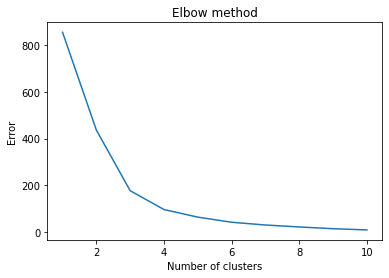

In [5]:
Error = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
plt.plot(range(1,11),Error)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.show()

Finally, we visualize the clusters. We can see that most animals with 4 to 8 legs are of the fifth, sixth, or seventh type.

Text(0, 0.5, 'Type')

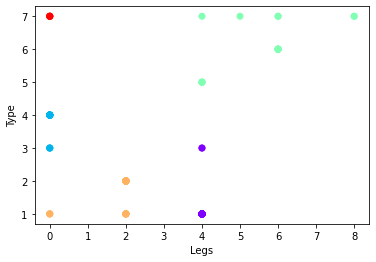

In [6]:
plt.scatter(x[:,0],x[:,1], c= y_kmeans5, cmap='rainbow')
plt.xlabel('Legs')
plt.ylabel('Type')

Classification using Decision Trees

Classification is also one of the methods of data mining, it employes supervised learning (has expertise from past data,
then classify new data). One of the popular algorithms/teqniques that classification uses is Decision Tree. Decision Tree
is an algorithm used to devide the training set until each devision consists of examples from one class.

At first, we installed the necessary libraries.

In [7]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


Then, we have imported the required libraries.

In [8]:
import pandas as pd
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
seed = 10


Then, we have generated our dataset, and displayed it.

In [9]:
import numpy as np

from sklearn import datasets
df = pd.read_csv('C:\\Users\\iiber\\anaconda3\\Lib\\site-packages\\sklearn\\datasets\\data\\zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


After that, we extracted Zoo dataset values and labels and splitting them into train set and test set.
To do this, we split the 'type' column as a single df,then we split the other columns (except 'animal name') as another single df, We excluded the column 'animal names) because its type is object and we'll not need it.
We display x values after spliting.



In [10]:
# splitting column type as a single df 
y = df['type'].values

# splitting other columns (except animal name) as another df
x=df.drop(['animal name','type'],axis=1).values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.34, stratify = y, random_state = seed)

# display x values after spliting
x

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=int64)

display y values ('type') after splitting


In [11]:
y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

We Create a Decision Tree Classifier. the criterion was the "gini", gini is one of the splitting criteria
used to determines the purity of a class as a result of a decision to branch along a particular attribute.

In [12]:
tree = DecisionTreeClassifier(criterion = 'gini',
                             min_samples_leaf = 5,
                             min_samples_split = 5,
                             max_depth = None,
                             random_state = seed)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
y_pred

array([6, 2, 1, 1, 2, 2, 1, 4, 1, 6, 7, 1, 6, 1, 3, 2, 1, 1, 2, 4, 4, 1,
       1, 1, 1, 1, 3, 2, 2, 6, 4, 4, 6, 3, 1], dtype=int64)

Here, we noticed the differences and we compare between y_test and y_prediction

In [13]:
print(y_test)
print(y_pred)

[6 2 1 1 2 2 1 4 1 6 7 1 7 1 3 2 1 1 2 4 4 1 1 1 1 1 3 2 2 7 4 4 6 5 1]
[6 2 1 1 2 2 1 4 1 6 7 1 6 1 3 2 1 1 2 4 4 1 1 1 1 1 3 2 2 6 4 4 6 3 1]


We calculated the accuracy of the model, the result was 0.91, the prediction result was very good and very close.

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print('DecisionTreeClassiffier accuracy score: {}'.format(accuracy))

DecisionTreeClassiffier accuracy score: 0.9142857142857143


Finally, we plotted the tree. At label_names we have written all the class values, which represent different sets of animals

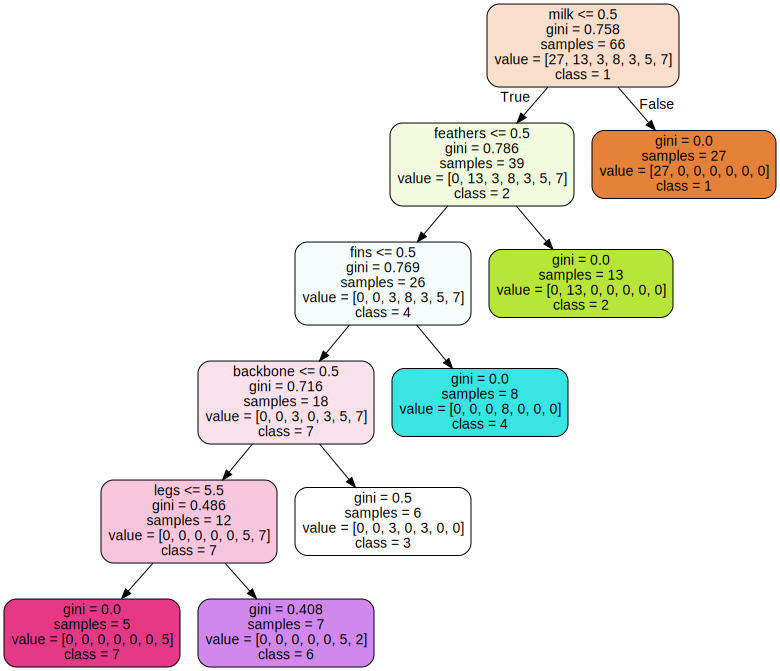

In [15]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\\iiber\\anaconda3\\Lib\\Graphviz\\bin'

label_names=['1','2','3','4','5','6','7']
graph_data=export_graphviz(tree,
                               feature_names= df.drop(['animal name','type'],axis=1).columns,
                               class_names= label_names ,
                               filled=True,
                               rounded=True,
                               out_file=None)
graph=graphviz.Source(graph_data)
graph
# graph.render(plot_title)
